# Titanic Survival Predictions #
To analyse Titanic Survival Predictions using training and testing datasets downloaded from the Kaggle site: https://www.kaggle.com/c/titanic/data.<br/>

This analysis takes into account the survival chances of classes in each columns like Passenger Class, Passenger Gender, Alone passeger etc.

In [1]:
# Importing Pandas and Numpy libraries
%matplotlib inline
import pandas as pd
import numpy as np
import re as re
train_data = pd.read_csv('./MLData/01_Titanic_Survivals/train.csv')
test_data = pd.read_csv('./MLData/01_Titanic_Survivals/test.csv')
full_data = [train_data, test_data]
train_data.shape, test_data.shape

((891, 12), (418, 11))

In [2]:
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
test_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
# To check null values count in each columns
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Analysing Relations between various Feature columns and Survival rate ##
### Passenger Class vs Survived Passengers ###
Passenger in higher class may have higher chances of survival.<br/>
Checking the relation between passenger class (**Pclass**) and the survived passengers (**Survived**) in the training dataset.

In [8]:
Pcl_surv = train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()
Pcl_surv

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


### Passenger Gender vs Survived Passengers ###
Female passenger may have higher chances of survival as they get the life boats first.<br/>
Checking the relation between passenger sex (**Sex**) and the survived passengers (**Survived**) in the training dataset.

In [9]:
Pgn_sur = train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()
Pgn_sur

,Sex,Survived
0,female,0.742038
1,male,0.188908


### Family Size vs Survived Passengers ###
Smaller families may have higher chances of all members survival as compared to bigger families.<br/>
Checking the relation between FamilySize (**FamilySize**) and the survived passengers (**Survived**) in the training dataset.<br/><br/>
Column **SibSp** means Number of Siblings/Spouses Aboard<br />
Column **Parch** means Number of Parents/Children Aboard<br />
With the number of Siblings/Spouse and the number of Children/Parents we can create new feature called Family Size.

In [10]:
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

Fsz_surv = train_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean()
Fsz_surv

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


### Alone Passengers vs Survived Passengers ###
Alone passengers may have higher chances of survival as compared to passengers in bigger groups.<br/>
Checking the relation between alone passengers (**IsNotAlone**) and the survived passengers (**Survived**) in the training dataset.

If a passenger has at least FamilySize = 1, then he/she is not alone<br />
Else the passenger is travelling alone.

Selecting data by row numbers or index number (.iloc)<br />
Selecting data by label or by a conditional statment (.loc)

In [11]:
for dataset in full_data:
    dataset['IsNotAlone'] = 0    # IsNotAlone = 0 means the passenger is alone
    dataset.loc[dataset['FamilySize'] == 1, 'IsNotAlone'] = 1    # Otherwise means the passenger is not alone

Nal_surv = train_data[['IsNotAlone', 'Survived']].groupby(['IsNotAlone'], as_index=False).mean()
Nal_surv

,IsNotAlone,Survived
0,0,0.505650
1,1,0.303538


### Embarked vs Survived Passengers ###
The column **embarked** means Port of Embarkation <br />
Embarkation is the process of loading passengers to a ship or an airplane.<br />
Values are: C = Cherbourg, Q = Queenstown, S = Southampton<br />

This sections is to see passengers from which Port of Embarkation survived more as compared to others.<br/>
Hence, checking the relation between Embarked (**embarked**) and the survived passengers (**Survived**) in the training dataset.<br/>

(The embarked column has some missing value. So we try to fill those with the most occurred value ( 'S' ), calculated with the collowing code.)

In [12]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

Emb_surv = train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()
Emb_surv

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### Fare vs Survived Passengers ###
Can **Fare** play a role in survival?<br />

Fare also has some missing value and we will replace it with the median value. And we categorize it into 4 ranges.<br />

Here we use **qcut** function from pandas library. Qcut is a quantile-based discretization function. It discretize variable into equal-sized buckets based on rank or based on sample quantiles.

In [14]:
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(train_data['Fare'].median())

train_data['CategoricalFare'] = pd.qcut(train_data['Fare'], 4)

Far_surv = train_data[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean()
Far_surv

,CategoricalFare,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


### Age vs Survived Passengers ###
**Age** could play a role in survival too. Children and elderly ones may get preference in a life boat and so they may get survived.<br />

There are many missing cells in this feature. We generate random numbers between (mean - std. dev) and (mean + std.dev). Then we categorize it into 5 range.<br />

Use **cut** function from the pandas library when you need to segment and sort data values into bins. This function is also useful for going from a continuous variable to a categorical variable.

In [15]:
# To handle an error
pd.set_option('mode.chained_assignment', None)

for dataset in full_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()    

    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size = age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)

train_data['CategoricalAge'] = pd.cut(train_data['Age'], 5)

Cag_surv = train_data[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean()
Cag_surv

,CategoricalAge,Survived
0,"(-0.08, 16.0]",0.527273
1,"(16.0, 32.0]",0.348786
2,"(32.0, 48.0]",0.383065
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


### Passengers Title vs Survived Passengers ###
Passengers title could also be a parameter which can decide on survival. Passengers title are like Dr, Major, Mme, Mr, Mrs, Sir, etc. <br />
Inside the feature **Name**, we can find the title of people.<br /><br />
Python's built-in **re** module provides support for Regular Expressions in regexes or regex pattern.

In [16]:
# Function to get passengers titles
def get_title(title):
    title_search = re.search(' ([A-Za-z]+)\.', title)
    if title_search:
        return title_search.group(1)
    return ""

for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)

Pas_title = pd.crosstab(train_data['Title'], train_data['Sex'])
Pas_title

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


The following section generalise passengers titles in 5 catagories:
1. Master - for boys
2. Miss - for girls
3. Mr - for men
4. Mrs - for women, and
5. Rare - for all other titles like Col, Don, Dr, Major, Rev, Sir, Jonkheer, etc.

And then finding survivals for each of these generalised titles.

In [17]:
# Function to generalised titles
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr',\
                                                 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

Ptl_surv = train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()
Ptl_surv

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


### Data Cleaning ###
Now let's clean our data and map our features into numerical values for applying Machine Learning.

In [18]:
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsNotAlone,CategoricalFare,CategoricalAge,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,2,0,"(-0.001, 7.91]","(16.0, 32.0]",Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,2,0,"(31.0, 512.329]","(32.0, 48.0]",Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,"(7.91, 14.454]","(16.0, 32.0]",Miss


In [19]:
test_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsNotAlone,Title
0,892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,NaN,Q,1,1,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,NaN,S,2,0,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,NaN,Q,1,1,Mr


In [20]:
for dataset in full_data:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    
    # Mapping Titles
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)     # If title does not exist, fill with 0
    
    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
    dataset['Age'] = dataset['Age'].astype(int)

full_data[0].head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsNotAlone,CategoricalFare,CategoricalAge,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,0,NaN,0,2,0,"(-0.001, 7.91]","(16.0, 32.0]",1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,PC 17599,3,C85,1,2,0,"(31.0, 512.329]","(32.0, 48.0]",3
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,1,NaN,0,1,1,"(7.91, 14.454]","(16.0, 32.0]",2


In [21]:
full_data[1].head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsNotAlone,Title
0,892,3,"Kelly, Mr. James",1,2,0,0,330911,0,NaN,2,1,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,2,1,0,363272,0,NaN,0,2,0,3
2,894,2,"Myles, Mr. Thomas Francis",1,3,0,0,240276,1,NaN,2,1,1,1


In [22]:
# Feature Selection
# Insignifcant columns for analysis are dropped in the final training and test dataset
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'FamilySize']
train_data = full_data[0].drop(drop_elements, axis = 1)
train_data = train_data.drop(['CategoricalAge', 'CategoricalFare'], axis = 1)

test_data  = full_data[1].drop(drop_elements, axis = 1)

train_data = train_data.values
test_data  = test_data.values

In [23]:
train_data

array([[0, 3, 1, ..., 0, 0, 1],
       [1, 1, 0, ..., 1, 0, 3],
       [1, 3, 0, ..., 0, 1, 2],
       ...,
       [0, 3, 0, ..., 0, 0, 2],
       [1, 1, 1, ..., 1, 1, 1],
       [0, 3, 1, ..., 2, 1, 1]], dtype=int64)

In [24]:
test_data

array([[3, 1, 2, ..., 2, 1, 1],
       [3, 0, 2, ..., 0, 0, 3],
       [2, 1, 3, ..., 2, 1, 1],
       ...,
       [3, 1, 2, ..., 0, 1, 1],
       [3, 1, 1, ..., 0, 1, 1],
       [3, 1, 1, ..., 1, 0, 4]], dtype=int64)

## Classifier Comparision ##
Compring all the classifiers in the sklearn package to see which model gives the best comparision result.

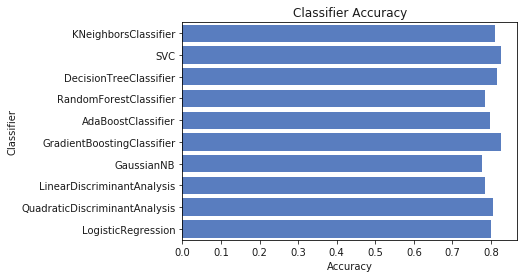

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

classifiers = [
    KNeighborsClassifier(3),
    SVC(gamma=2, C=1), # probability=True
    DecisionTreeClassifier(max_depth=7),
    RandomForestClassifier(max_depth=2, n_estimators=10, random_state=0),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(random_state=42, solver='lbfgs')]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

X = train_data[0::, 1::]
y = train_data[0::, 0]

acc_dict = {}

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_train, y_train)
        train_predictions = clf.predict(X_test)
        acc = accuracy_score(y_test, train_predictions)
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

## Prediction with the best Classifier ##
The best classifier appears to be GradientBoostingClassifier. We can use it to predict our test data.

In [26]:
candidate_classifier = GradientBoostingClassifier()
candidate_classifier.fit(train_data[0::, 1::], train_data[0::, 0])
result = candidate_classifier.predict(test_data)
print(result)

[0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 1 1 1 1 1 0 1 0 0 1]


In [27]:
# Converting the above Numpy Array to Pandas DataFrame
result_df = pd.DataFrame(result)
columns=['Survived']
#result_df.columns = result_df.columns+1
result_df.columns = columns
result_df.index = result_df.index
result_df.head()

,Survived
0,0
1,1
2,0
3,0
4,1


In [28]:
full_data[1].head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsNotAlone,Title
0,892,3,"Kelly, Mr. James",1,2,0,0,330911,0,NaN,2,1,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,2,1,0,363272,0,NaN,0,2,0,3
2,894,2,"Myles, Mr. Thomas Francis",1,3,0,0,240276,1,NaN,2,1,1,1
3,895,3,"Wirz, Mr. Albert",1,1,0,0,315154,1,NaN,0,1,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1,1,1,3101298,1,NaN,0,3,0,3


In [29]:
result.shape, full_data[1].shape

((418,), (418, 14))

In [30]:
final = pd.concat([result_df, full_data[1]], axis=1)
final.head()

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsNotAlone,Title
0,0,892,3,"Kelly, Mr. James",1,2,0,0,330911,0,NaN,2,1,1,1
1,1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,2,1,0,363272,0,NaN,0,2,0,3
2,0,894,2,"Myles, Mr. Thomas Francis",1,3,0,0,240276,1,NaN,2,1,1,1
3,0,895,3,"Wirz, Mr. Albert",1,1,0,0,315154,1,NaN,0,1,1,1
4,1,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1,1,1,3101298,1,NaN,0,3,0,3


### Conclusion ###
This example shows how we can apply Machine Learning in predicting survivals in Titanic sinking incident based on some parameters or features. We can apply similar predictions on other real world datasets.